### Fraud Detection in Credit Card Transactions using ML Techniques
Oladimeji Salau
https://github.com/Spandanapamuru-15

# Introduction
In today's digital economy, credit card transactions have become a fundamental part of daily commerce. However, with this convenience comes an increasing threat of financial fraud. Detecting fraudulent activities in real time is a critical concern for financial institutions and consumers alike. Given the massive volume of transactions and the subtlety of fraudulent behavior, manual detection is nearly impossible — this is where Machine Learning (ML) comes into play.

This project focuses on building a fraud detection system using a combination of anomaly detection techniques and supervised learning, enabling the identification of unusual transaction patterns that may indicate fraud. The solution is enhanced with an interactive web interface to make fraud prediction accessible and real-time.

# Data Description
The dataset contains 284,807 credit card transactions made by European cardholders over a two-day period in September 2013. Among these, only 492 transactions are labeled as fraudulent, making up just 0.172% of the data, which highlights the highly imbalanced nature of the dataset—a common challenge in fraud detection tasks.

Each transaction is described by 30 features. Of these, 28 features (V1 to V28) are the result of a Principal Component Analysis (PCA) transformation applied for confidentiality. The remaining features, Time and Amount, are kept in their original form, where Time represents the seconds elapsed since the first transaction and Amount indicates the transaction value in Euros. The target feature, Class, is binary: 1 for fraudulent transactions and 0 for legitimate ones.


# Import Libraries

In [38]:
pip install notebook

Note: you may need to restart the kernel to use updated packages.


In [39]:
!pip install imbalanced-learn


In [40]:
# Import basic libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import os
from imblearn.over_sampling import ADASYN 
from collections import Counter

# Scikit-learn packages
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import BernoulliNB 
from sklearn import metrics

# Use this only in Jupyter
%matplotlib inline

# Plot settings
sn.set_style("dark")
sn.set_palette("colorblind")


# Load Data
The dataset used in this project is freely available at: https://www.kaggle.com/mlg-ulb/creditcardfraud/data

In [41]:
df = pd.read_csv("creditcard.csv")

In [42]:
# View top 5 records
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [43]:
# determine the number of records in the dataset
print('The dataset contains {0} rows and {1} columns.'.format(df.shape[0], df.shape[1]))

The dataset contains 1986 rows and 31 columns.


In [44]:
# check for missing values and data types of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1986 entries, 0 to 1985
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    1986 non-null   int64  
 1   V1      1986 non-null   float64
 2   V2      1986 non-null   float64
 3   V3      1986 non-null   float64
 4   V4      1986 non-null   float64
 5   V5      1986 non-null   float64
 6   V6      1986 non-null   float64
 7   V7      1986 non-null   float64
 8   V8      1986 non-null   float64
 9   V9      1986 non-null   float64
 10  V10     1986 non-null   float64
 11  V11     1986 non-null   float64
 12  V12     1986 non-null   float64
 13  V13     1986 non-null   float64
 14  V14     1985 non-null   float64
 15  V15     1985 non-null   float64
 16  V16     1985 non-null   float64
 17  V17     1985 non-null   float64
 18  V18     1985 non-null   float64
 19  V19     1985 non-null   float64
 20  V20     1985 non-null   float64
 21  V21     1985 non-null   float64
 22  

# Explore label class

In [45]:
print('Normal transactions count: ', df['Class'].value_counts().values[0])
print('Fraudulent transactions count: ', df['Class'].value_counts().values[1])

Normal transactions count:  1983
Fraudulent transactions count:  2


# Separate feature data (predictors) from labels

In [46]:
# feature data (predictors)
X = df.iloc[:, :-1]

# label class
y = df['Class']

# Standardize data
Scale the data to have zero mean and unit variance.

In [47]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

# Partition data into train and test sets

In [48]:
# Partition data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.33, random_state=42)

# Data Sampling
As noted earlier, the dataset is unbalanced. Training unbalanced dataset with learning algorithms may lead to misclassification of minority class. Therefore, to compensate for the unbalancedness, we will use ADASYN oversampling method as implemented in imbalanced-learn package to resample the dataset.

ADASYN (ADAptive SYNthetic) is an oversampling technique that adaptively generates minority data samples according to their distributions using K nearest neighbor.

In [53]:
from imblearn.over_sampling import ADASYN
from collections import Counter
import pandas as pd

X_train = pd.DataFrame(X_train)
y_train = pd.Series(y_train, name='target')

train_data = pd.concat([X_train, y_train], axis=1)
train_data = train_data.dropna()

X_train_clean = train_data.drop(columns=['target'])
y_train_clean = train_data['target']

ada = ADASYN(random_state=42, n_neighbors=1)
print('Original dataset shape {}'.format(Counter(y_train_clean)))
X_res, y_res = ada.fit_resample(X_train_clean, y_train_clean)
print('Resampled dataset shape {}'.format(Counter(y_res)))


Original dataset shape Counter({0.0: 891, 1.0: 2})
Resampled dataset shape Counter({0.0: 891, 1.0: 890})


# Train Models
Three machine learning algorithms: Logistic Regression, Naive Baye, and RandomForest classifiers were trained using the processed feature data.

In [54]:
X_train, y_train = X_res, y_res 

# Train LogisticRegression Model
LGR_Classifier = LogisticRegression()
LGR_Classifier.fit(X_train, y_train);

# Train Decision Tree Model
RDF_Classifier = RandomForestClassifier(random_state=0)
RDF_Classifier.fit(X_train, y_train);

# Train Bernoulli Naive Baye Model
BNB_Classifier = BernoulliNB()
BNB_Classifier.fit(X_train, y_train);

# Evaluate Models

In [55]:
# Evaluate models
modlist = [('RandomForest Classifier', RDF_Classifier),('LogisticRegression', LGR_Classifier),
('Naive Baiye Classifier', BNB_Classifier)] 

models = [j for j in modlist]

print()
print('========================== Model Evaluation Results ========================' "\n")  

for i, v in models:
    scores = cross_val_score(v, X_train, y_train, cv=10)
    accuracy = metrics.accuracy_score(y_train, v.predict(X_train))
    confusion_matrix = metrics.confusion_matrix(y_train, v.predict(X_train))
    classification = metrics.classification_report(y_train, v.predict(X_train))
    print('===== {} ====='.format(i))
    print()
    print ("Cross Validation Mean Score: ", '{}%'.format(np.round(scores.mean(), 3) * 100))  
    print() 
    print ("Model Accuracy: ", '{}%'.format(np.round(accuracy, 3) * 100)) 
    print()
    print("Confusion Matrix:" "\n", confusion_matrix)
    print()
    print("Classification Report:" "\n", classification) 
    print()


========================== Model Evaluation Results ========================

===== RandomForest Classifier =====

Cross Validation Mean Score:  100.0%

Model Accuracy:  100.0%

Confusion Matrix:
 [[891   0]
 [  0 890]]

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       891
         1.0       1.00      1.00      1.00       890

    accuracy                           1.00      1781
   macro avg       1.00      1.00      1.00      1781
weighted avg       1.00      1.00      1.00      1781


===== LogisticRegression =====

Cross Validation Mean Score:  99.9%

Model Accuracy:  100.0%

Confusion Matrix:
 [[891   0]
 [  0 890]]

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       891
         1.0       1.00      1.00      1.00       890

    accuracy                           1.00      1781
   macro avg       1.00      1.00      1.00    

# Test Models


==================== Model Test Results ====================

=== Logistic Regression ===
Model Accuracy: 100.0%

Confusion Matrix:
 [[397   0]
 [  0   0]]


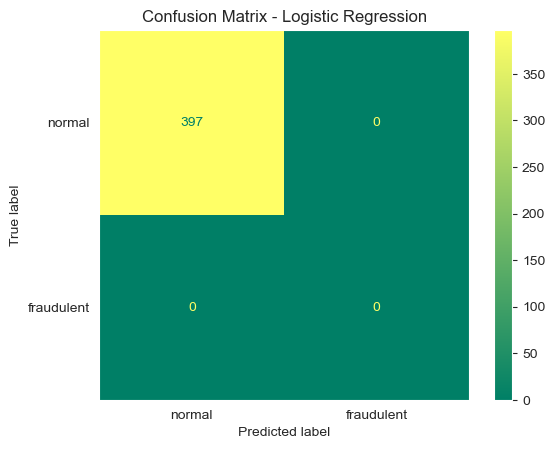

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       397
           1       0.00      0.00      0.00         0

    accuracy                           1.00       397
   macro avg       0.50      0.50      0.50       397
weighted avg       1.00      1.00      1.00       397


=== Random Forest ===
Model Accuracy: 100.0%

Confusion Matrix:
 [[397   0]
 [  0   0]]


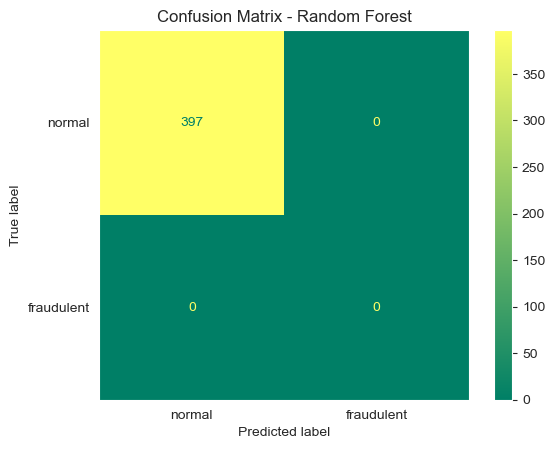

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       397
           1       0.00      0.00      0.00         0

    accuracy                           1.00       397
   macro avg       0.50      0.50      0.50       397
weighted avg       1.00      1.00      1.00       397


=== SVM ===
Model Accuracy: 100.0%

Confusion Matrix:
 [[397   0]
 [  0   0]]


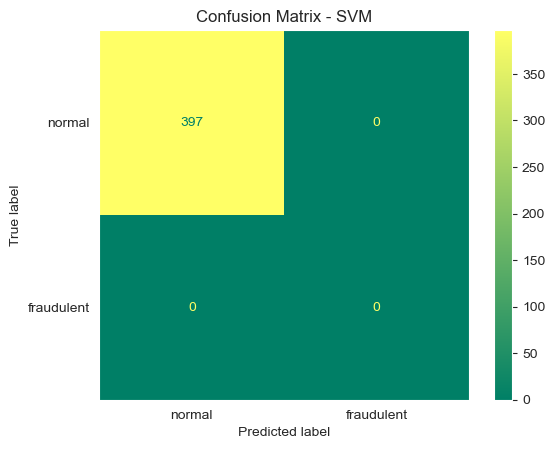

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       397
           1       0.00      0.00      0.00         0

    accuracy                           1.00       397
   macro avg       0.50      0.50      0.50       397
weighted avg       1.00      1.00      1.00       397


=== Decision Tree ===
Model Accuracy: 100.0%

Confusion Matrix:
 [[397   0]
 [  0   0]]


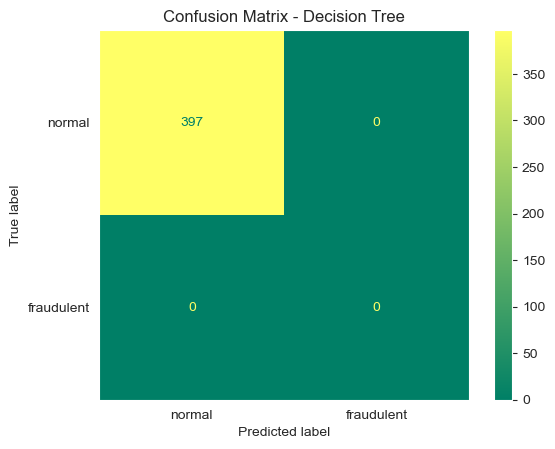

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       397
           1       0.00      0.00      0.00         0

    accuracy                           1.00       397
   macro avg       0.50      0.50      0.50       397
weighted avg       1.00      1.00      1.00       397


==================== ROC Curve ====================

ROC AUC cannot be calculated: only one class present in y_test.


In [78]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
import matplotlib.pyplot as plt

# === Example: assume X and y already loaded ===
# Replace these with your real dataset
# Example:
# df = pd.read_csv("your_cleaned_data.csv")
# X = df.drop(columns=["target"])
# y = df["target"]

# === Step 1: Drop NaNs from both X and y ===
if isinstance(y, pd.Series):
    mask = y.notna()
else:
    mask = ~np.isnan(y)

X = X[mask]
y = y[mask]
X = X.dropna()

# === Step 2: Train/Test split ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# === Step 3: Train models ===
lr = LogisticRegression(max_iter=1000)
rf = RandomForestClassifier()
svm = SVC(probability=True)
dt = DecisionTreeClassifier()

lr.fit(X_train, y_train)
rf.fit(X_train, y_train)
svm.fit(X_train, y_train)
dt.fit(X_train, y_train)

models = [
    ('Logistic Regression', lr),
    ('Random Forest', rf),
    ('SVM', svm),
    ('Decision Tree', dt)
]

# === Step 4: Evaluation ===
classdict = {'normal': 0, 'fraudulent': 1}
labels = [0, 1]

print('\n==================== Model Test Results ====================\n')

for name, model in models:
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred, labels=labels)
    report = classification_report(y_test, y_pred, labels=labels, zero_division=0)

    print(f'=== {name} ===')
    print(f'Model Accuracy: {np.round(acc, 3) * 100}%\n')
    print("Confusion Matrix:\n", cm)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(classdict.keys()))
    disp.plot(cmap=plt.cm.summer)
    plt.title(f'Confusion Matrix - {name}')
    plt.grid(False)
    plt.show()

    print("Classification Report:\n", report)
    print()

# === Step 5: ROC Curve Plot ===
print('==================== ROC Curve ====================\n')

if len(np.unique(y_test)) < 2:
    print("ROC AUC cannot be calculated: only one class present in y_test.")
else:
    plt.figure(figsize=(8, 6))
    for name, model in models:
        try:
            if hasattr(model, "predict_proba"):
                y_score = model.predict_proba(X_test)[:, 1]
            else:
                y_score = model.decision_function(X_test)

            fpr, tpr, _ = roc_curve(y_test, y_score)
            auc = roc_auc_score(y_test, y_score)
            plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})")
        except Exception as e:
            print(f"Could not calculate ROC for {name}: {e}")

    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()
